### Model Explainability

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('../Data/Fraud_Data.csv')
df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,Class
0,22058,2/24/2015 22:55,4/18/2015 2:47,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,6/7/2015 20:39,6/8/2015 1:38,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,1/1/2015 18:52,1/1/2015 18:52,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,4/28/2015 21:13,5/4/2015 13:54,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,7/21/2015 7:09,9/9/2015 18:40,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [6]:
# Check unique values per column
for col in df.select_dtypes(include='object'):
    print(col, df[col].nunique())

signup_time 135572
purchase_time 121599
device_id 137956
source 3
browser 5
sex 2


In [7]:
cat_cols = ['source','browser', 'sex']  # example
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)
df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,age,ip_address,Class,source_Direct,source_SEO,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_M
0,22058,2/24/2015 22:55,4/18/2015 2:47,34,QVPSPJUOCKZAR,39,7.327584e+08,0,False,True,False,False,False,False,True
1,333320,6/7/2015 20:39,6/8/2015 1:38,16,EOGFQPIZPYXFZ,53,3.503114e+08,0,False,False,False,False,False,False,False
2,1359,1/1/2015 18:52,1/1/2015 18:52,15,YSSKYOSJHPPLJ,53,2.621474e+09,1,False,True,False,False,True,False,True
3,150084,4/28/2015 21:13,5/4/2015 13:54,44,ATGTXKYKUDUQN,41,3.840542e+09,0,False,True,False,False,False,True,True
4,221365,7/21/2015 7:09,9/9/2015 18:40,39,NAUITBZFJKHWW,45,4.155831e+08,0,False,False,False,False,False,True,True


In [8]:
from sklearn.preprocessing import LabelEncoder

high_card_cols = ['device_id', 'ip_address']  # example
for col in high_card_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [9]:
df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,age,ip_address,Class,source_Direct,source_SEO,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_M
0,22058,2/24/2015 22:55,4/18/2015 2:47,34,89215,39,25429,0,False,True,False,False,False,False,True
1,333320,6/7/2015 20:39,6/8/2015 1:38,16,24078,53,12037,0,False,False,False,False,False,False,False
2,1359,1/1/2015 18:52,1/1/2015 18:52,15,131216,53,87283,1,False,True,False,False,True,False,True
3,150084,4/28/2015 21:13,5/4/2015 13:54,44,3977,41,127789,0,False,True,False,False,False,True,True
4,221365,7/21/2015 7:09,9/9/2015 18:40,39,68757,45,14309,0,False,False,False,False,False,True,True


In [10]:
df = df.sample(n=3000, random_state=42)  # reduces memory footprint

In [11]:
X = df.iloc[:,4:]
y  = df.iloc[:,0]

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1502)

In [13]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=20, random_state=1502)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=20, random_state=1502)

In [14]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
X_test.columns

Index(['device_id', 'age', 'ip_address', 'Class', 'source_Direct',
       'source_SEO', 'browser_FireFox', 'browser_IE', 'browser_Opera',
       'browser_Safari', 'sex_M'],
      dtype='object')

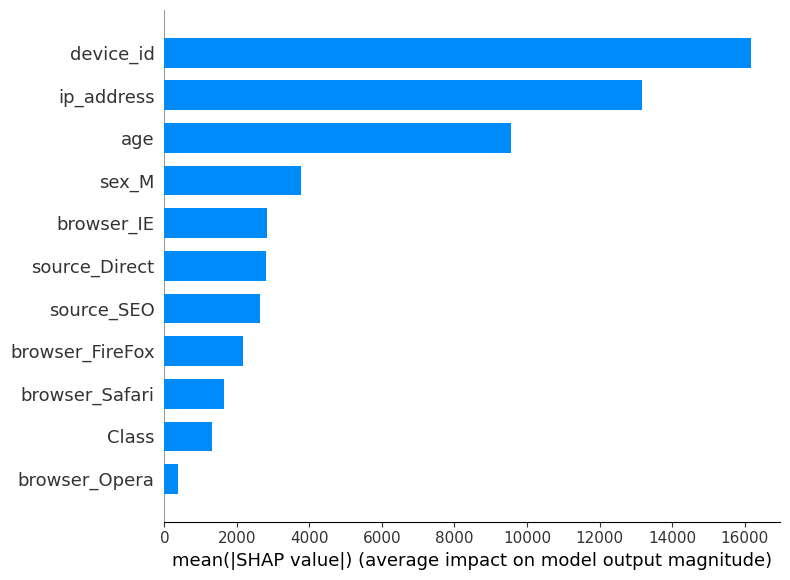

In [17]:
# SHAP Summary
shap.summary_plot(shap_values, X_test, plot_type="bar")

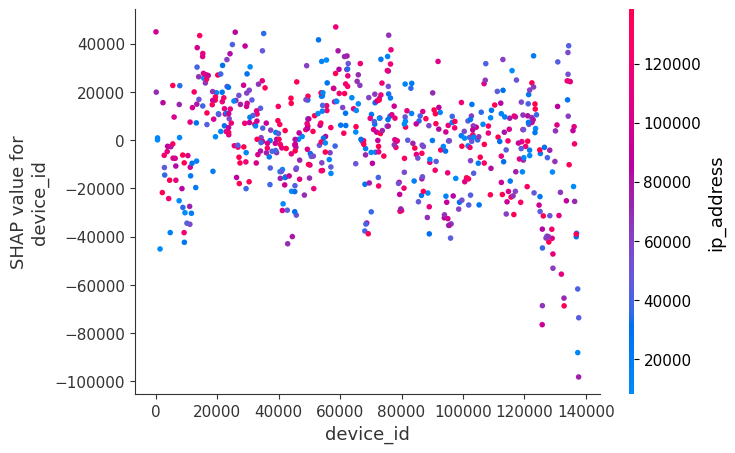

In [16]:
# Dependency Plot
shap.dependence_plot('device_id', shap_values, X_test)

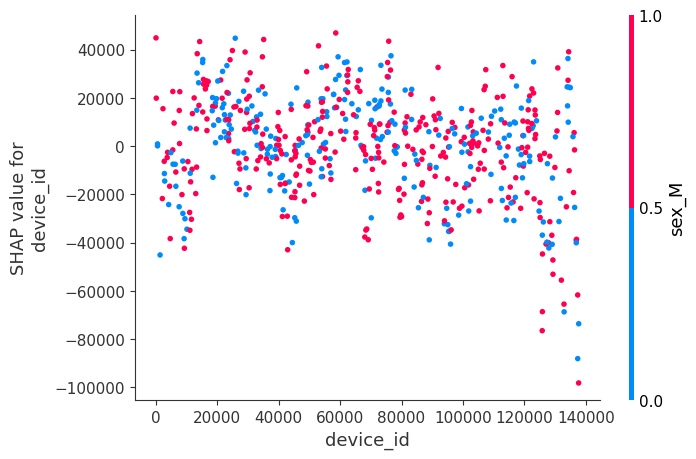

In [18]:
shap.dependence_plot('device_id', shap_values, X_test, interaction_index='sex_M')

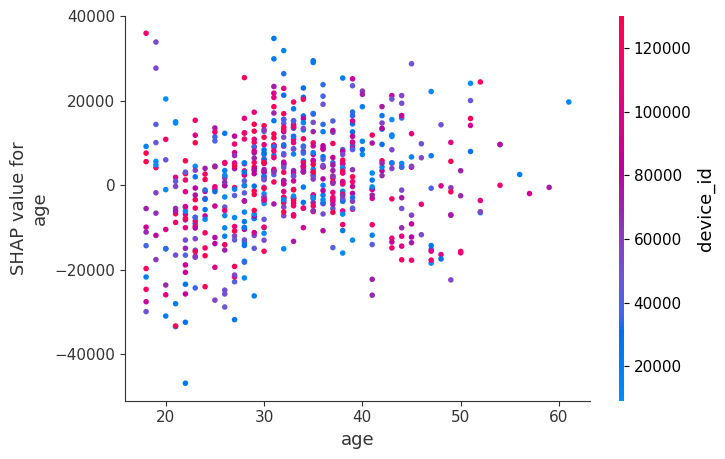

In [19]:
shap.dependence_plot('age', shap_values, X_test)

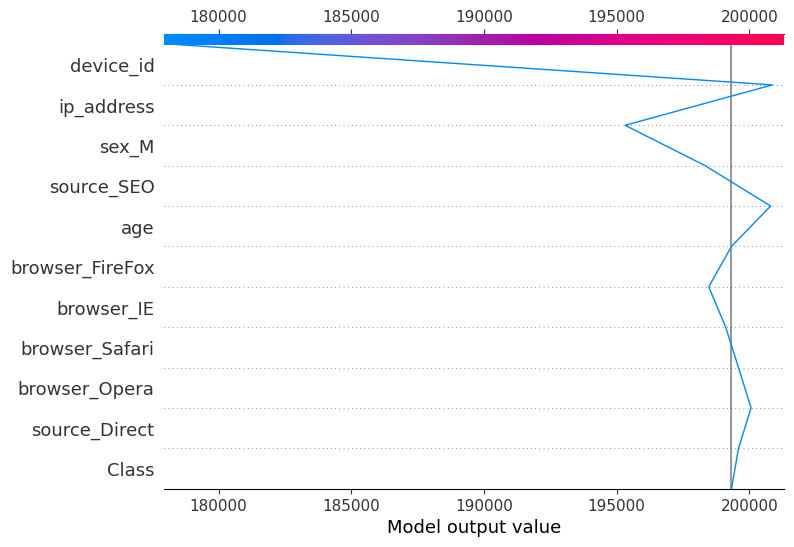

In [20]:
shap.decision_plot(explainer.expected_value[0], shap_values[0], X_test.columns)

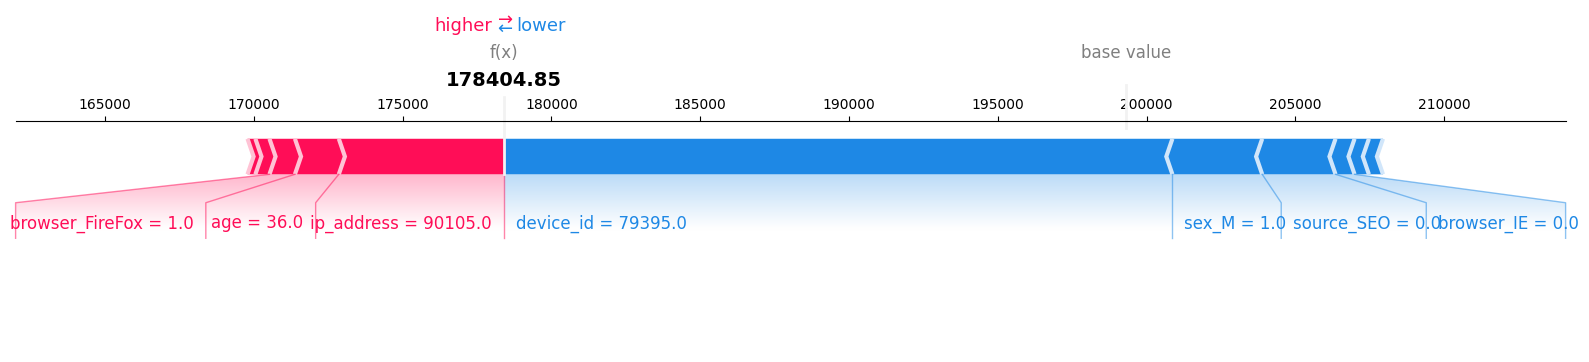

In [21]:
shap.plots.force(explainer.expected_value[0], shap_values[0,:], X_test.iloc[0, :], matplotlib = True)

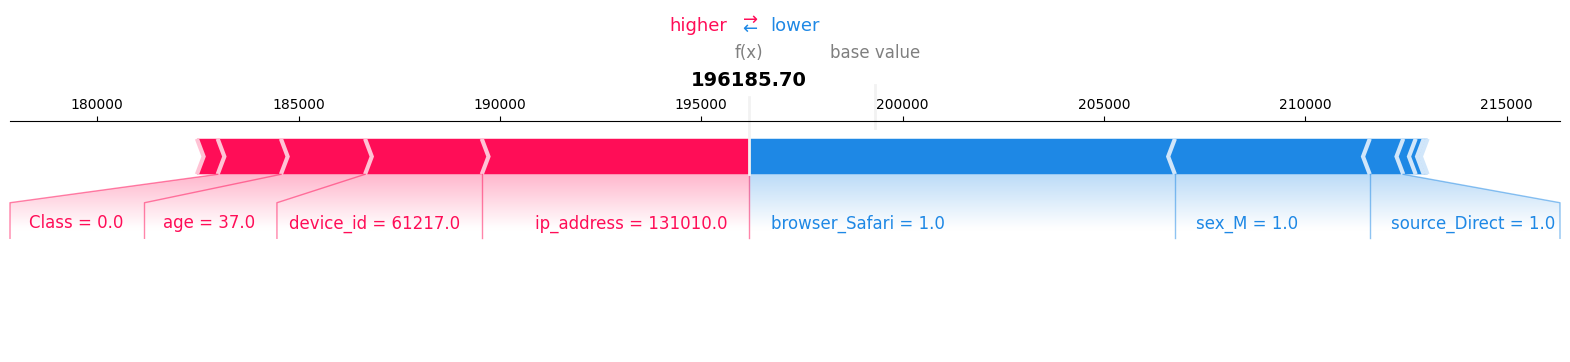

In [22]:
shap.plots.force(explainer.expected_value[0], shap_values[6, :], X_test.iloc[6, :],matplotlib = True)